#Породы

Загружаем ранее созданный датасет пород

In [ ]:
!tar xfz /12.tar.gz
#!rm 1.tar.gz

In [ ]:

import builtins
import os
import pickle
import time
import pylab
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from ipywidgets import interact, interactive, fixed
import os
from PIL import Image
from tensorflow import keras
from keras.layers import *
import shutil

Определим и скомпилируем модель нейронной сети для обработки изображений пород с использованием библиотеки Keras.

In [ ]:
from PIL import Image
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import img_to_array, load_img

dataset_dir = 'kinds'

images_3 = []
targets_3 = []
image_size = (128, 128)

for folder in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder)
    
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        
    
        image = load_img(file_path, target_size=image_size)
        image_array = img_to_array(image)
        images_3.append(image_array)

        targets_3.append(folder)
        
images_3 = np.array(images_3, dtype=np.float32)
targets_3 = np.array(targets_3)

train_images_3, test_images_3, train_targets_3, test_targets_3 = train_test_split(images_3, targets_3, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
train_targets_encoded_3 = label_encoder.fit_transform(train_targets_3)
test_targets_encoded_3 = label_encoder.transform(test_targets_3)

Код создает модель на основе архитектуры VGG16 с предобученными весами на наборе данных ImageNet. Затем модель расширяется, добавляются новые слои для адаптации к конкретной задаче. В итоге, модель состоит из сверточных слоев VGG16, слоя Flatten для преобразования выходных данных в одномерный вектор, полносвязных слоев и слоя Dropout для предотвращения переобучения

In [ ]:
vgg16 = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for x in vgg16.layers:
    x.trainable = False
model = keras.models.Sequential()
model.add(vgg16)
model.add(Flatten(input_shape=train_images_3[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(35, activation='softmax'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(train_images_3, train_targets_encoded_3, validation_data=(test_images_3, test_targets_encoded_3), epochs=40)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 35)                8995      
                                                                 
Total params: 16,821,091
Trainable params: 2,106,403
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/40
185/185 [==============

Обучаем модель VGG16

In [ ]:
hist = model.fit(train_images_3, train_targets_encoded_3, validation_data=(test_images_3, test_targets_encoded_3), epochs=20)

Epoch 1/20
185/185 [==============================] - 11s 61ms/step - loss: 0.7385 - accuracy: 0.7525 - val_loss: 2.2081 - val_accuracy: 0.5643
Epoch 2/20
185/185 [==============================] - 11s 57ms/step - loss: 0.7425 - accuracy: 0.7495 - val_loss: 2.2612 - val_accuracy: 0.5785
Epoch 3/20
185/185 [==============================] - 11s 58ms/step - loss: 0.7134 - accuracy: 0.7623 - val_loss: 2.3218 - val_accuracy: 0.5717
Epoch 4/20
185/185 [==============================] - 11s 58ms/step - loss: 0.6841 - accuracy: 0.7652 - val_loss: 2.3878 - val_accuracy: 0.5568
Epoch 5/20
185/185 [==============================] - 11s 59ms/step - loss: 0.6931 - accuracy: 0.7695 - val_loss: 2.2958 - val_accuracy: 0.5582
Epoch 6/20
185/185 [==============================] - 10s 55ms/step - loss: 0.6792 - accuracy: 0.7715 - val_loss: 2.3901 - val_accuracy: 0.5595
Epoch 7/20
185/185 [==============================] - 11s 59ms/step - loss: 0.6559 - accuracy: 0.7801 - val_loss: 2.3937 - val_accuracy:

Смотрим, как можем переобучить на нашем датасете VGG19

In [ ]:
vgg19 = keras.applications.vgg19.VGG19(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
for x in vgg19.layers:
    x.trainable = False
model = keras.models.Sequential()
model.add(vgg19)
model.add(Flatten(input_shape=train_images_3[1:]))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(35, activation='softmax'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(train_images_3, train_targets_encoded_3, validation_data=(test_images_3, test_targets_encoded_3), epochs=40)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 35)                8995      
                                                                 
Total params: 22,130,787
Trainable params: 2,106,403
Non-trainable params: 20,024,384
_________________________________________________________________
Epoch 1/40
185/185 [==============

Смотрим, как можем переобучить на нашем датасете resnet50

In [ ]:
resnet = keras.applications.resnet.ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for x in resnet.layers:
    x.trainable = False
model3 = keras.models.Sequential()
model3.add(resnet)
model3.add(Flatten(input_shape=train_images_3[1:]))
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(35, activation='softmax'))
model3.summary()

model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model3.fit(train_images_3, train_targets_encoded_3, validation_data=(test_images_3, test_targets_encoded_3), epochs=40)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_6 (Flatten)         (None, 32768)             0         
                                                                 
 dense_12 (Dense)            (None, 256)               8388864   
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 35)                8995      
                                                                 
Total params: 31,985,571
Trainable params: 8,397,859
Non-trainable params: 23,587,712
_________________________________________________________________
Epoch 1/40
185/185 [==============

In [ ]:
resnet = keras.applications.resnet.ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for x in resnet.layers:
    x.trainable = False
model2 = keras.models.Sequential()
model2.add(resnet)
model2.add(Flatten(input_shape=train_images_3[1:]))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(35, activation='softmax'))
model2.summary()

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model2.fit(train_images_3, train_targets_encoded_3, validation_data=(test_images_3, test_targets_encoded_3), epochs=40)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 35)                8995      
                                                                 
Total params: 31,985,571
Trainable params: 8,397,859
Non-trainable params: 23,587,712
_________________________________________________________________
Epoch 1/40
185/185 [================

Лучшей оказалась последняя модель, построим для неё матрицу ошибок и посчитаем топ 3 и топ 5 долю правильных ответов.

Выполним итерацию по парам изображений и соответствующих закодированных целевых меток, k = 3

In [ ]:
pred_3 = model2.predict(test_images_3)
reduce_sum_3 = tf.reduce_sum(tf.cast(tf.math.in_top_k(test_targets_encoded_3, pred_3, k=3), dtype=tf.int32)) / len(test_targets_encoded_3)
print(reduce_sum_3)

47/47 [==============================] - 3s 34ms/step
tf.Tensor(0.8694181326116374, shape=(), dtype=float64)


Выполним итерацию по парам изображений и соответствующих закодированных целевых меток, k = 5

In [ ]:
pred_5 = model2.predict(test_images_3)
reduce_sum_5 = tf.reduce_sum(tf.cast(tf.math.in_top_k(test_targets_encoded_3, pred_5, k=5), dtype=tf.int32)) / len(test_targets_encoded_3)
print(reduce_sum_5)

47/47 [==============================] - 2s 34ms/step
tf.Tensor(0.9208389715832206, shape=(), dtype=float64)


Посчитаем матрицу ошибок

47/47 [==============================] - 2s 34ms/step


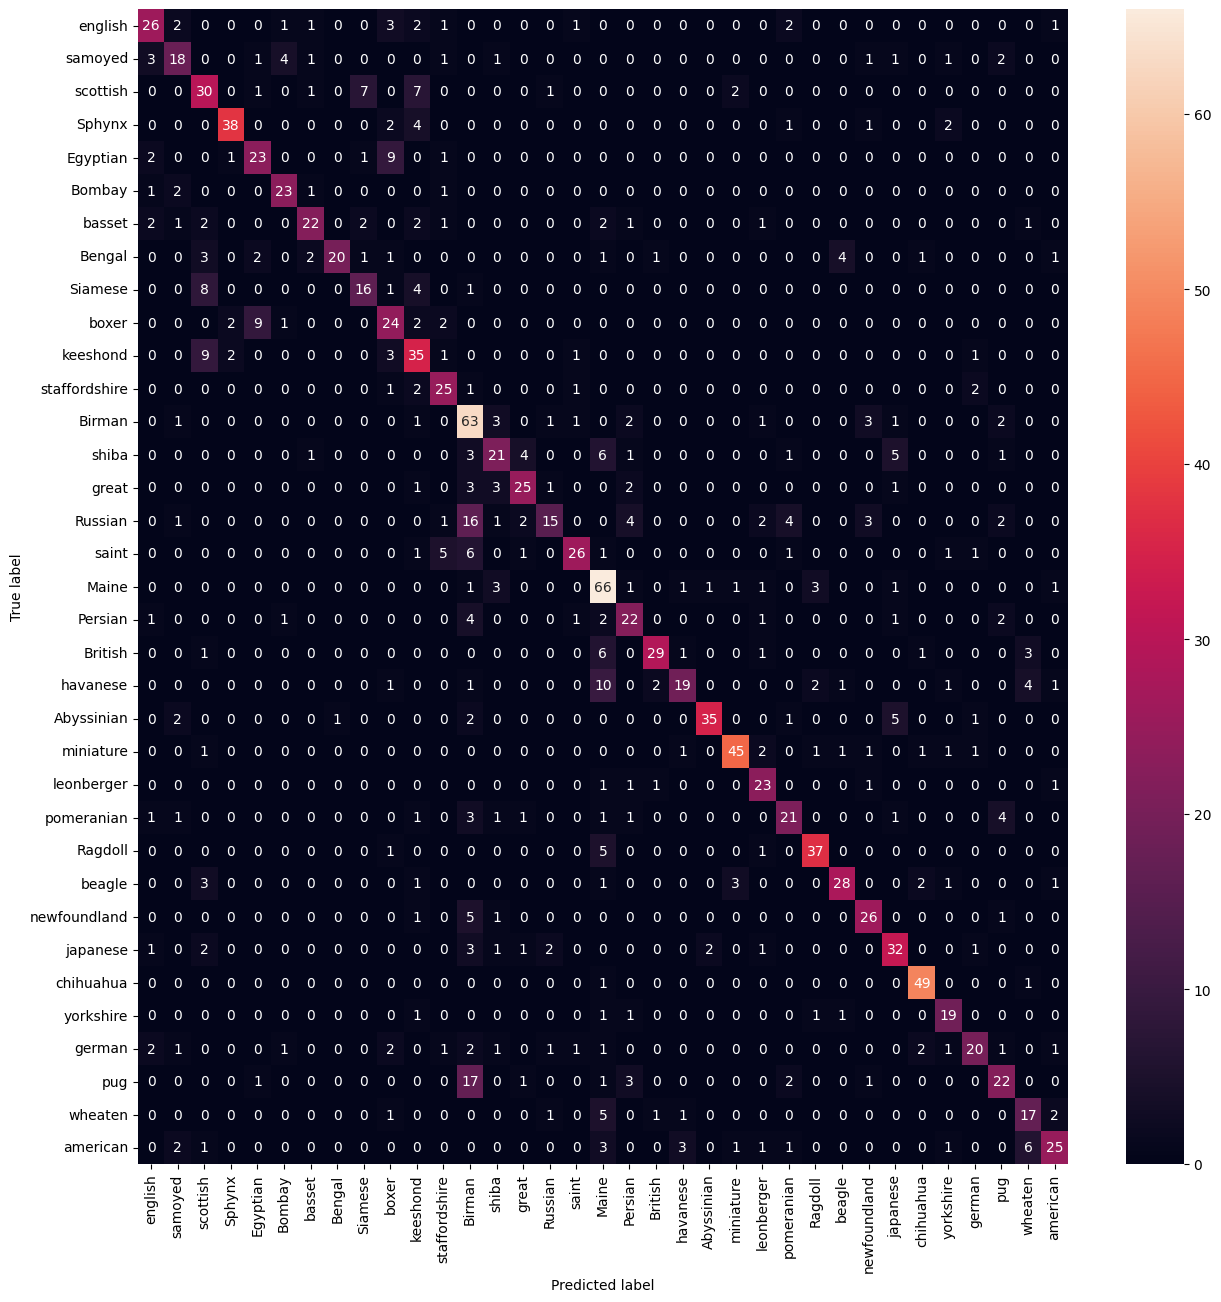

In [ ]:
from sklearn.metrics import confusion_matrix

predictions = model2.predict(test_images_3)
predicted_labels = np.argmax(predictions, axis=1)

confusion_mat = confusion_matrix(test_targets_encoded_3, predicted_labels)

import pandas as pd
import seaborn as sns
plt.figure(figsize=(15,15))
labels=list(set(targets_3))
df = pd.DataFrame(confusion_mat, index=labels, columns=labels).astype(int)
heatmap = sns.heatmap(df, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Кошки и собаки

Выгрузим датасет из kaggle

In [ ]:
api_token = {"username":"amirkhashimov","key":"6fd62c09d4bc046e99ebd4d6c929c94b"}
import sys
import json
!{sys.executable} -m pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle
with open('kaggle.json', 'w') as file:
  json.dump(api_token, file)
  !mv kaggle.json ~/.kaggle
  !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d devdgohil/the-oxfordiiit-pet-dataset

 99% 776M/780M [00:08<00:00, 97.4MB/s]
100% 780M/780M [00:08<00:00, 96.9MB/s]


In [ ]:
!unzip the-oxfordiiit-pet-dataset.zip
!rm the-oxfordiiit-pet-dataset.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: images/images/Sphynx_9.jpg  
  inflating: images/images/Sphynx_90.jpg  
  inflating: images/images/Sphynx_91.jpg  
  inflating: images/images/Sphynx_92.jpg  
  inflating: images/images/Sphynx_93.jpg  
  inflating: images/images/Sphynx_94.jpg  
  inflating: images/images/Sphynx_95.jpg  
  inflating: images/images/Sphynx_96.jpg  
  inflating: images/images/Sphynx_98.jpg  
  inflating: images/images/Sphynx_99.jpg  
  inflating: images/images/american_bulldog_10.jpg  
  inflating: images/images/american_bulldog_100.jpg  
  inflating: images/images/american_bulldog_101.jpg  
  inflating: images/images/american_bulldog_102.jpg  
  inflating: images/images/american_bulldog_103.jpg  
  inflating: images/images/american_bulldog_104.jpg  
  inflating: images/images/american_bulldog_105.jpg  
  inflating: images/images/american_bulldog_106.jpg  
  inflating: images/images/american_bulldog_107.jpg  
  inflating: image

In [ ]:
!mkdir binary
!mkdir binary/cats
!mkdir binary/dogs

Разделим на директории кошек м собак

In [ ]:
source_folder="images/images"
cats_folder="binary/cats"
dogs_folder="binary/dogs"

for filename in os.listdir(source_folder):
    source_path = os.path.join(source_folder, filename)

    # Проверяем, начинается ли имя файла с заглавной буквы
    if filename[0].isupper():
        # Перемещаем файл в папку "cats"
        destination_path = os.path.join(cats_folder, filename)
        shutil.move(source_path, destination_path)
    else:
        # Перемещаем файл в папку "dogs"
        destination_path = os.path.join(dogs_folder, filename)
        shutil.move(source_path, destination_path)

In [ ]:
!rmdir binary/cats/.ipynb_checkpoints

rmdir: failed to remove 'binary/cats/.ipynb_checkpoints': No such file or directory


In [ ]:
folder_path = 'binary/cats'  # Путь к папке, из которой нужно удалить файлы

# Перебираем файлы в папке
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)

    # Проверяем, является ли файл не файлом с расширением ".jpg"
    if not filename.endswith(".jpg"):
        # Удаляем файл
        os.remove(file_path)


Для бинарной классификации создадим датасет из классов кошек и собак

In [ ]:
from PIL import Image
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import img_to_array, load_img

dataset_dir = 'binary'

images_1 = []
targets_1 = []
image_size = (128, 128)

for folder in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder)
    
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        
    
        image = load_img(file_path, target_size=image_size)
        image_array = img_to_array(image)
        images_1.append(image_array)

        targets_1.append(folder)
        
images_1 = np.array(images_1, dtype=np.float32)
targets_1 = np.array(targets_1)

train_images_1, test_images_1, train_targets_1, test_targets_1 = train_test_split(images_1, targets_1, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
train_targets_encoded_1 = label_encoder.fit_transform(train_targets_1)
test_targets_encoded_1 = label_encoder.transform(test_targets_1)

Определим и скомпилируем модель c RESNET нейронной сети для обработки бинарной классификации кошк и собак с использованием библиотеки Keras с помощью модели c RESNET

Обучим нашу модель

In [ ]:
resnet = keras.applications.resnet.ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for x in resnet.layers:
    x.trainable = False
model = keras.models.Sequential()
model.add(resnet)
model.add(Flatten(input_shape=train_images_1[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

hist = model.fit(train_images_1, train_targets_encoded_1, validation_data=(test_images_1, test_targets_encoded_1), epochs=5)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               8388864   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 31,976,833
Trainable params: 8,389,121
Non-trainable params: 23,587,712
_________________________________________________________________
Epoch 1/5
185/185 [===============

Посчитаем матрицу ошибок для бинарной классификации

47/47 [==============================] - 3s 35ms/step


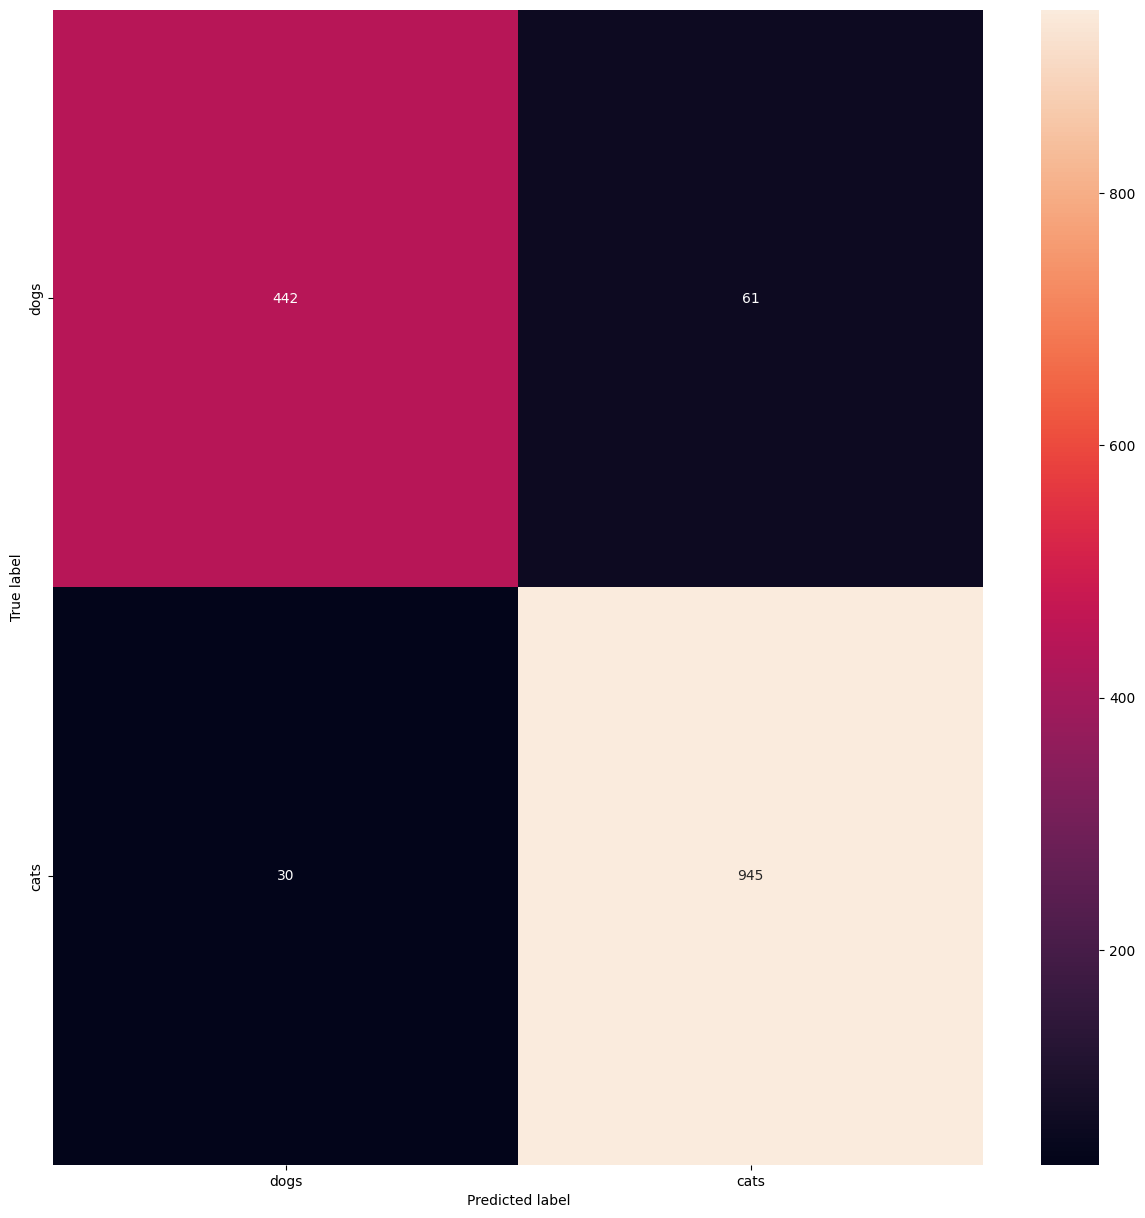

In [ ]:
from sklearn.metrics import confusion_matrix

predictions = model.predict(test_images_1)
predicted_labels = (predictions > 0.5).astype(int)

confusion_mat = confusion_matrix(test_targets_encoded_1, predicted_labels)

import pandas as pd
import seaborn as sns
plt.figure(figsize=(15,15))
labels=['dogs', 'cats']
df = pd.DataFrame(confusion_mat, index=labels, columns=labels).astype(int)
heatmap = sns.heatmap(df, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()